In [1]:
import numpy as np#you usually need numpy

#---these are for plots---#
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.size']=16
plt.rcParams['font.family']='dejavu sans'

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.rm']='custom'
plt.rcParams['mathtext.it']='stix:italic'
plt.rcParams['mathtext.bf']='stix:bold'
#-------------------------#

In [2]:
#load the module

from os import  getcwd, chdir

curDir=getcwd()#this is the directory of the notebook
chdir('../../src')#go to the direcory that interfacePy is located
from interfacePy.Axion import Axion 
from interfacePy.WKB import relic 
from interfacePy.Cosmo import Hubble,s
from interfacePy.AxionMass import ma2
from interfacePy.FT import FT #easy tick formatting

chdir(curDir)#return to the directory of the notebook

In [3]:
#load theta_i, fa, Tosc, theta_osc, relic

#for RD universe
RDDat=np.loadtxt('RD.dat')
#for Matter
MatterDat=np.loadtxt('Matter.dat')
#for Kination
KinationDat=np.loadtxt('Kination.dat')

In [4]:
def Matter(fa):
    '''find the approximate entropy injection factor between Tosc and today in NSC and Tosc'''
    inputFile="../../Examples/InputExamples/MatterInput.dat" 
    _=np.loadtxt(inputFile)
    for u,T,logH in _[_[:,1]<5]:
        if ma2(T,fa)**0.5>=3*np.exp(logH):
            uosc,Tosc=u,T
            return s(_[-1][1])/s(Tosc)*np.exp(3*(_[-1][0]-uosc)),Tosc            
    
def Kination(fa):
    '''find the approximate entropy injection factor between Tosc and today in NSC and Tosc'''
    inputFile="../../Examples/InputExamples/KinationInput.dat" 
    _=np.loadtxt(inputFile)
    for u,T,logH in _[_[:,1]<20]:
        if ma2(T,fa)**0.5>=3*np.exp(logH):
            uosc,Tosc=u,T
            return s(_[-1][1])/s(Tosc)*np.exp(3*(_[-1][0]-uosc)),Tosc            
    

def RD(fa):
    '''find the approximate entropy injection factor between Tosc and today in NSC and Tosc'''
    inputFile="../../Examples/InputExamples/RDinput.dat" 
    _=np.loadtxt(inputFile)
    for u,T,logH in _[_[:,1]<20]:
        if ma2(T,fa)**0.5>=3*np.exp(logH):
            uosc,Tosc=u,T
            return s(_[-1][1])/s(Tosc)*np.exp(3*(_[-1][0]-uosc)),Tosc            
    



In [5]:
Matter(1e12),Kination(1e12),RD(1e12)

((281273576.3887098, 0.2536056698439287),
 (0.999999993957983, 0.5228132595319466),
 (0.9999994098041876, 0.9715519149229738))

In [6]:
Matter_diff_i=[]
Matter_diff_osc=[]
gamma_osc=[]
for theta_i,fa,theta_osc,T_osc,Omegah2 in MatterDat:
    gamma,Tosc=Matter(fa)
    gamma_osc.append(gamma)
    Matter_diff_i.append(np.abs(Omegah2-relic(T_osc,theta_i,gamma))/Omegah2)
    Matter_diff_osc.append(np.abs(Omegah2-relic(T_osc,theta_osc,gamma))/Omegah2)

    
Matter_diff_i=np.array(Matter_diff_i)
Matter_diff_osc=np.array(Matter_diff_osc)

Kination_diff_i=[]
Kination_diff_osc=[]

for theta_i,fa,theta_osc,T_osc,Omegah2 in KinationDat:
    Kination_diff_i.append(np.abs(Omegah2-relic(T_osc,theta_i))/Omegah2)
    Kination_diff_osc.append(np.abs(Omegah2-relic(T_osc,theta_osc))/Omegah2)

    
Kination_diff_i=np.array(Kination_diff_i)
Kination_diff_osc=np.array(Kination_diff_osc)

RD_diff_i=[]
RD_diff_osc=[]

for theta_i,fa,theta_osc,T_osc,Omegah2 in RDDat:
    RD_diff_i.append(np.abs(Omegah2-relic(T_osc,theta_i))/Omegah2)
    RD_diff_osc.append(np.abs(Omegah2-relic(T_osc,theta_osc))/Omegah2)

    
RD_diff_i=np.array(RD_diff_i)
RD_diff_osc=np.array(RD_diff_osc)

<IPython.core.display.Javascript object>


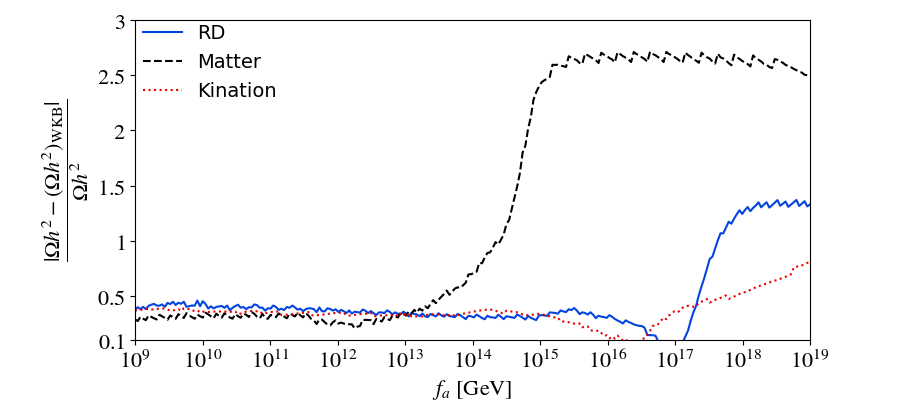

In [11]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
    fig.suptitle('')

    sub = fig.add_subplot(1,1,1)

    sub.plot(RDDat[:,1],RD_diff_i,linestyle='-',c='xkcd:blue',label=r"RD")
    sub.plot(MatterDat[:,1],Matter_diff_i,linestyle='--',c='xkcd:black',label=r"Matter")
    sub.plot(KinationDat[:,1],Kination_diff_i,linestyle=':',c='xkcd:red',label=r"Kination")

    sub.set_xlabel(r'$f_a ~ [{\rm GeV}]$')
    sub.set_ylabel(r'$\dfrac{\left|\Omega h^2 - \left(\Omega h^2\right)_{\rm WKB}\right|}{\Omega h^2}$')

    sub.legend(bbox_to_anchor=(0.01, 0.99),borderaxespad=0., 
               borderpad=0.05,ncol=1,loc='upper left',fontsize=14,framealpha=0)
    #set major ticks
    _M_xticks=[ 10.**i for i in range(9,20) ]
    _M_yticks=[  0.1 if i==0 else 0.5*i for i in range(0,10) ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=1e9,xmax=1e19,ymin=1e-1,ymax=3,xscale='log',yscale='linear')

    ft.format_ticks(plt,sub)    

    plt.savefig('WKB_diff_i.pdf',bbox_inches='tight')
    fig.show()

<IPython.core.display.Javascript object>


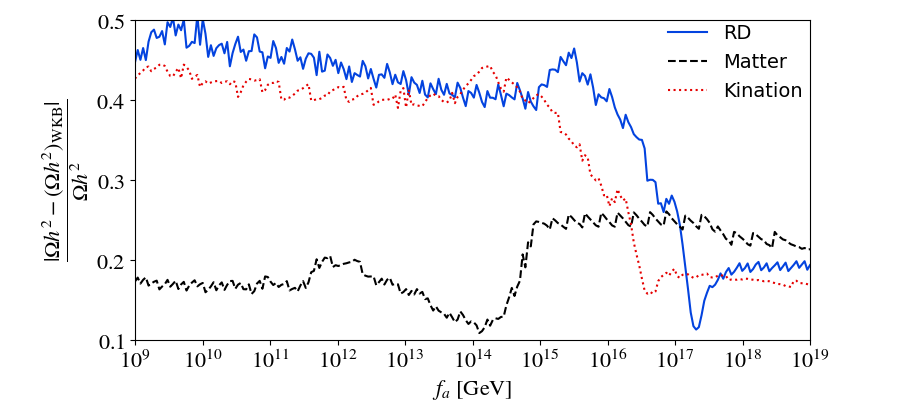

In [12]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
    fig.suptitle('')

    sub = fig.add_subplot(1,1,1)

    sub.plot(RDDat[:,1],RD_diff_osc,linestyle='-',c='xkcd:blue',label=r"RD")
    sub.plot(MatterDat[:,1],Matter_diff_osc,linestyle='--',c='xkcd:black',label=r"Matter")
    sub.plot(KinationDat[:,1],Kination_diff_osc,linestyle=':',c='xkcd:red',label=r"Kination")

    sub.set_xlabel(r'$f_a ~ [{\rm GeV}]$')
    sub.set_ylabel(r'$\dfrac{\left|\Omega h^2 - \left(\Omega h^2\right)_{\rm WKB}\right|}{\Omega h^2}$')

    sub.legend(bbox_to_anchor=(0.99, 0.99),borderaxespad=0., 
               borderpad=0.05,ncol=1,loc='upper right',fontsize=14,framealpha=0)
    #set major ticks
    _M_xticks=[ 10.**i for i in range(9,20) ]
    _M_yticks=[  0.1,0.2,0.3,0.4,0.5 ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=1e9,xmax=1e19,ymin=1e-1,ymax=0.5,xscale='log',yscale='linear')

    ft.format_ticks(plt,sub)    

    plt.savefig('WKB_diff_osc.pdf',bbox_inches='tight')
    fig.show()

<IPython.core.display.Javascript object>


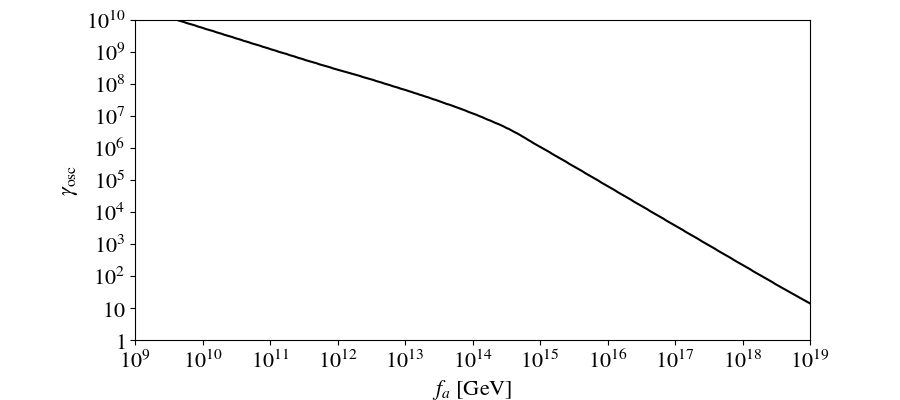

In [13]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
    fig.suptitle('')

    sub = fig.add_subplot(1,1,1)

    sub.plot(MatterDat[:,1],gamma_osc,linestyle='-',c='xkcd:black')

    sub.set_xlabel(r'$f_a ~ [{\rm GeV}]$')
    sub.set_ylabel(r'$\gamma_{\rm osc}$')

    #set major ticks
    _M_xticks=[ 10.**i for i in range(9,20) ]
    _M_yticks=[ 10.**i for i in range(-1,13) ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=1e9,xmax=1e19,ymin=1,ymax=1e10,xscale='log',yscale='log')

    ft.format_ticks(plt,sub) 

    plt.savefig('gamma_osc.pdf',bbox_inches='tight')
    fig.show()

In [15]:
if False:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
    fig.suptitle('')

    sub = fig.add_subplot(1,1,1)

    sub.plot(RDDat[:,1],RDDat[:,3],linestyle='-',c='xkcd:blue',label=r"RD")
    sub.plot(MatterDat[:,1],MatterDat[:,3],linestyle='--',c='xkcd:black',label=r"Matter")
    sub.plot(KinationDat[:,1],KinationDat[:,3],linestyle=':',c='xkcd:red',label=r"Kination")


    sub.set_xlabel(r'$f_a ~ [{\rm GeV}]$')
    sub.set_ylabel(r'$T_{\rm osc} ~ [{\rm GeV}]$')

    sub.legend(bbox_to_anchor=(0.99, 0.99),borderaxespad=0., 
               borderpad=0.05,ncol=1,loc='upper right',fontsize=14,framealpha=0)
    #set major ticks
    _M_xticks=[ 10.**i for i in range(9,20) ]
    _M_yticks=[ 10.**i for i in range(-2,2) ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=1e9,xmax=1e19,ymin=1e-2,ymax=10,xscale='log',yscale='log')

    ft.format_ticks(plt,sub)    

    fig.show()